<a href="https://colab.research.google.com/github/ZSCode768/Machine-Learning-Project/blob/main/Surlow_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook's purpose is to perform exploratory data analysis (EDA) on the "Game Recommendations on Steam" data set from kaggle. (https://www.kaggle.com/datasets/antonkozyriev/game-recommendations-on-steam)  The focus will be to understand the structure of the data, generate descriptive statistics,
handle missing values, and create visualizations.

## Key Objectives:
1. Load the dataset and examine its structure.
2. Perform basic cleaning and handle missing values.
3. Generate descriptive statistics.
4. Create visualizations to uncover insights.

The columns in the dataset are:

app_id

helpful

funny

date

is_recommended

hours

user_id

review_id

In [58]:
# Import necessary libraries.
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.impute import SimpleImputer

from google.colab import drive
drive.mount("/content/drive")

# Load the Dataset
file_path = '/content/drive/My Drive/datasets/game_recs/recommendations.csv'
df = pd.read_csv(file_path, delimiter=',', on_bad_lines='skip')

# Display first few rows and dataset info
print("Dataset Shape:", df.shape)
display(df)

print("Columns in the dataset:")
print(df.dtypes)

print("Columns List:")
print(df.columns)

print("Summary Statistics")
display(df.describe())

print("Categorical Column Insights:")
for col in df.select_dtypes(include='object').columns:
  print(f"\nColumn: {col}")
  print(df[col].value_counts())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-58-7b68f9419c85>:18: DtypeWarning: Columns (0,1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter=',', on_bad_lines='skip')


Dataset Shape: (3513134, 8)


,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0.0,2022-12-12,True,36.3,51580.0,0.0
1,304390,4,0.0,2017-02-17,False,11.5,2586.0,1.0
2,1085660,2,0.0,2019-11-17,True,336.5,253880.0,2.0
3,703080,0,0.0,2022-09-23,True,27.4,259432.0,3.0
4,526870,0,0.0,2021-01-10,True,7.9,23869.0,4.0
...,...,...,...,...,...,...,...,...
3513129,578080,0,0.0,2017-11-22,True,94.6,5849820.0,1200387.0
3513130,376210,0,0.0,2021-06-08,True,363.2,5861317.0,1200388.0
3513131,218620,0,0.0,2019-11-08,True,34.9,6066643.0,1200389.0
3513132,289070,0,0.0,2021-09-09,True,196.1,6452646.0,1200390.0


Columns in the dataset:
app_id             object
helpful            object
funny             float64
date               object
is_recommended     object
hours             float64
user_id           float64
review_id         float64
dtype: object
Columns List:
Index(['app_id', 'helpful', 'funny', 'date', 'is_recommended', 'hours',
       'user_id', 'review_id'],
      dtype='object')
Summary Statistics


,funny,hours,user_id,review_id
count,3.513124e+06,3.513110e+06,3.513104e+06,3.513095e+06
mean,1.503962e+00,2.024429e+02,7.280668e+06,6.005821e+05
std,4.812376e+02,1.074025e+03,4.175900e+06,3.382727e+05
min,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00
25%,0.000000e+00,3.100000e+01,3.851423e+06,3.078160e+05
50%,0.000000e+00,1.003000e+02,7.222203e+06,6.005830e+05
75%,0.000000e+00,2.848000e+02,1.110101e+07,8.933485e+05
max,6.362570e+05,1.136152e+06,1.153374e+09,8.767845e+06


Categorical Column Insights:

Column: app_id
app_id
252490           138914
730               95544
275850            82526
431960            82423
271590            81524
                  ...  
12866855              2
1248131-07-14         2
1942280               2
3733                  2
2013360               1
Name: count, Length: 423, dtype: int64

Column: helpful
helpful
0       2697020
2        324965
3        121854
0        104648
4         57537
         ...   
1938          1
1494          1
747           1
779           1
864           1
Name: count, Length: 1580, dtype: int64

Column: date
date
2022-11-22    19389
2022-11-23    17128
2022-11-24    12438
2019-06-29    12190
2020-11-25    11238
              ...  
2011-10-02        1
2013-01-29        1
2013-02-23        1
2011-04-17        1
2011-03-04        1
Name: count, Length: 4102, dtype: int64

Column: is_recommended
is_recommended
True        2303674
true         664823
False        423012
false        121595
true78

In [59]:
# Check for missing values
print("Missing values")
print(df.isnull().sum())

# Dropping missing values
df = df.dropna()

print("\nMissing values")
print(df.isnull().sum())

# Check for duplicate values
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Dropping missing values
df = df.drop_duplicates()

print(f"Number of duplicate rows after drop: {df.duplicated().sum()}")

print("Dataset Shape After Removing Duplicates:", df.shape)

Missing values
app_id             0
helpful            2
funny             10
date              12
is_recommended    16
hours             24
user_id           30
review_id         39
dtype: int64

Missing values
app_id            0
helpful           0
funny             0
date              0
is_recommended    0
hours             0
user_id           0
review_id         0
dtype: int64
Number of duplicate rows: 2118686
Number of duplicate rows after drop: 0
Dataset Shape After Removing Duplicates: (1394409, 8)


## Outcome Variable: 'helpful'

For this project, the outcome variable ('y') is the 'helpful' column, which represents the number of users who marked a specific review for a game as helpful.  This variable indicates the perceived value of a review to the community.

## Hypothesis
A review is more likely to be considered 'helpful' based upon the number of hours played and whether or not the game is recommended.  This is because a user will base their decision how informed another user is.  (For example, willing to trust someone with 200 hrs of game time recommending the title, as opposed the user with 5 hrs not recommending it.)

### Relevance of 'helpful'
By predicting the helpfulness of reviews, the project aims to:
1. Identify the key values that makes a review valuable. (recommendations,    hours played, etc...)
2.  Gain insight into how metrics of engagement like recommendations and playtime correlate with review usefulness.

### Predictive features
1. **is_recommended**: Whether or not the user recommends the game
2. **hours** The number of hours the reviewer played the game

### Class Imbalance in 'helpful'
'helpful' is a numeric variable (continuous) as such,
its distribution needs to be checked for skewness or outliers,
and it will need to be binarized for binary classification.

In [60]:
print(df['helpful'].describe())

count     1394409
unique       1576
top             0
freq      1059696
Name: helpful, dtype: int64


Analyzing whether or not a user finds another user's review helpful based on time played and if the other user recommends the game.

In [88]:
# Standardize helpful values to eliminate data corruption and create binary value of review being helpful or not helpful
df['helpful'] = pd.to_numeric(df['helpful'], errors='coerce')
df =  df.dropna(subset=['helpful'])
df['helpful_binary'] =  df['helpful'].apply(lambda x: 1 if x > 0 else 0)
df['helpful_binary'] =  df['helpful_binary'].replace({1: 'helpful', 0: 'not_helpful'})

# Display the is_recommended values after standardization
print(df['helpful_binary'].value_counts())
print("\n\n")
# Display Percentages
percen =  df['helpful_binary'].value_counts(normalize=True)*100
percen = percen.map(lambda x: f"%{x:.6f}")
print(percen)

helpful_binary
not_helpful    1112094
helpful         282315
Name: count, dtype: int64



helpful_binary
not_helpful    %79.753788
helpful        %20.246212
Name: proportion, dtype: object


Distribution of Reviews marked as Helpful

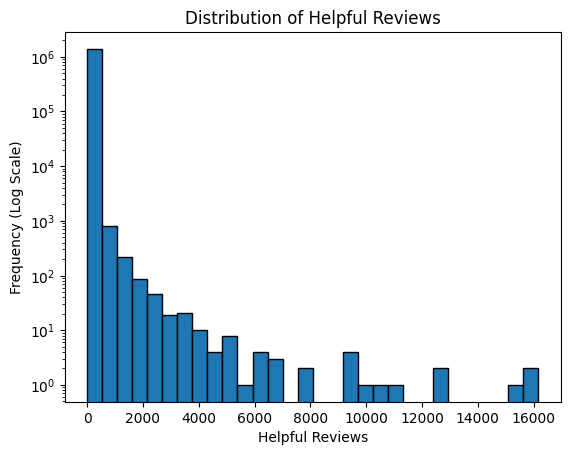

In [62]:
#Create a histogram to show distribution of 'helpful' votes
# Need to use log scale since the amounts of votes a review gets is low.
plt.hist(df['helpful'], bins=30, edgecolor='black')
plt.yscale('log')
plt.title('Distribution of Helpful Reviews')
plt.xlabel('Helpful Reviews')
plt.ylabel('Frequency (Log Scale)')
plt.show()

Based on the graph, many reviews have low engagement of 'helpful' votes, and as the number of helful number of votes increases the frequency of 'helpful' reviews decreases.

There are outliers with as many as 16000 votes, but the majority are near zero.  This makes sense since only people interested in the game will see the reviews, and as time goes on the reviews with the most votes are pushed towards the top of the page.

Distribution of Hours Played

<function matplotlib.pyplot.show(close=None, block=None)>

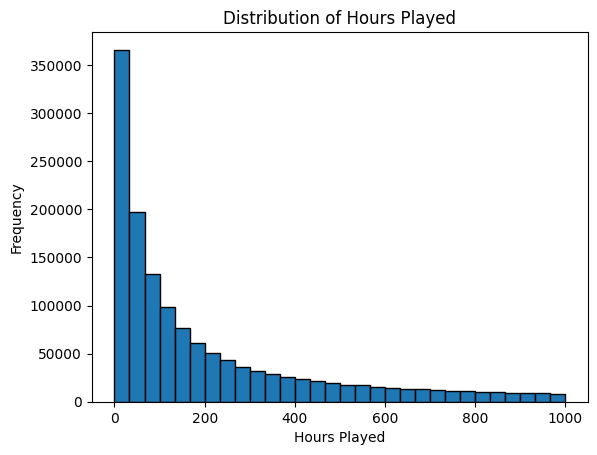

In [63]:
plt.hist(df['hours'], bins=30, edgecolor='black')
plt.title('Distribution of Hours Played')
plt.xlabel('Hours Played')
plt.ylabel('Frequency')
plt.show

Due to the fact that most games are under 60 hrs with most have an average of 8 hour play times, and the majority of gamers will play a game once, we see that most users have a play time closer to 0.  Also as the number of hours played gets larger there is an exponential decrease in reviews with high hour amounts.

Correlation Between Features

###Compare Helpful Votes vs Hours Played

In [64]:
#Compute correlation between helpful votes and hours played
correlation = df[['helpful', 'hours']].corr()
print("Correlation between helpful votes and hours played:")
print(correlation)

Correlation between helpful votes and hours played:
          helpful     hours
helpful  1.000000  0.006929
hours    0.006929  1.000000


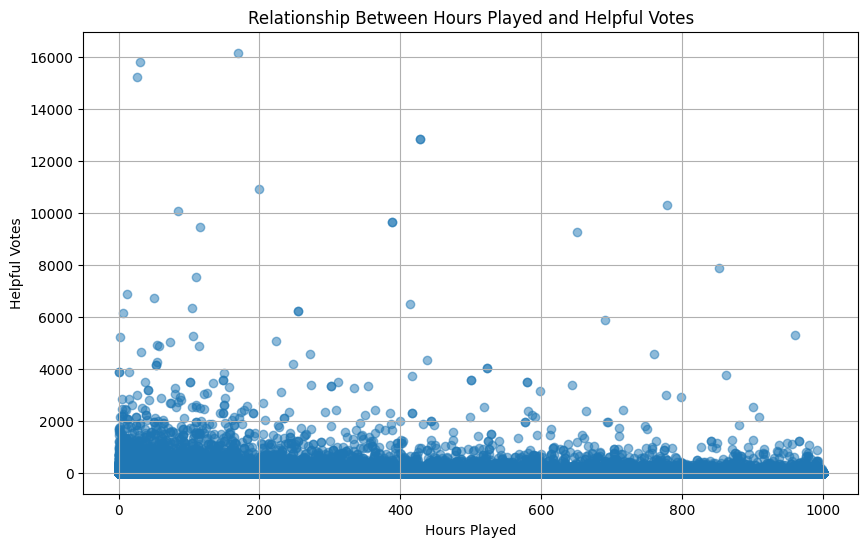

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(df['hours'], df['helpful'], alpha=0.5)
plt.title('Relationship Between Hours Played and Helpful Votes')
plt.xlabel('Hours Played')
plt.ylabel('Helpful Votes')
plt.grid(True)
plt.show()

The correlation between hours played and a review being voted as helpful turns out to be a weak realtionship.  The clustering near the bottom suggests that most reviews are for shorter games and have few helpful votes.

In [67]:
df['is_recommended'] = df['is_recommended'].str.lower()
df['is_recommended'] = df['is_recommended'].map({'true': True, 'false': False})
df['is_recommended'] = df['is_recommended'].fillna(False)

# Group by is_recommended and compute average helpful votes
recommendation_stats = df.groupby('is_recommended')['helpful'].mean()
print("Average helpful votes by recommendation status:")
print(recommendation_stats)

Average helpful votes by recommendation status:
is_recommended
False    3.581238
True     2.569023
Name: helpful, dtype: float64


<ipython-input-67-b683573c5bc5>:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_recommended'] = df['is_recommended'].fillna(False)


###Comparing Helpful Votes vs. Recommendations

In [68]:
df['is_recommended_numeric'] = df['is_recommended'].astype(int)

corr, p_value = pointbiserialr(df['is_recommended_numeric'], df['helpful'])
print(f"Point-Biserial Correlation: {corr}")
print(f"P-Value: {p_value}")

Point-Biserial Correlation: -0.007130526210527791
P-Value: 3.7587988765015834e-17


Based on the Point-Biserial Correlation value, there is little correlation between whether or not a review is considered helpful based on recommendation.

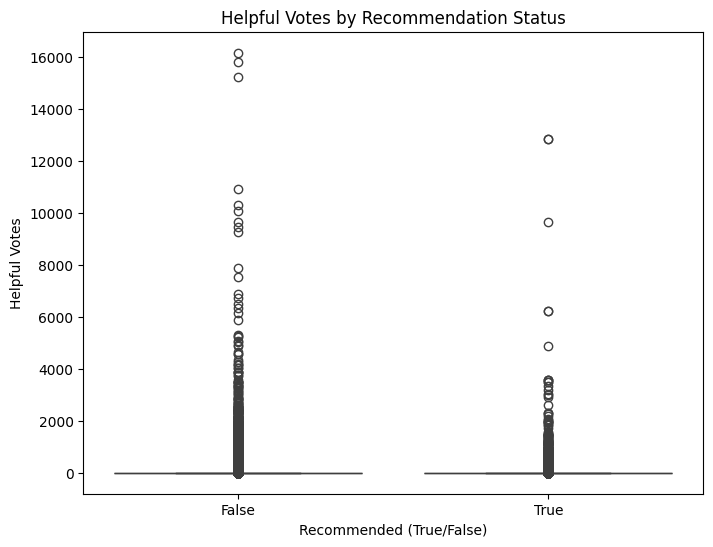

In [69]:
# Box plot for is_recommended vs. helpful votes
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_recommended', y='helpful', data=df)
plt.title('Helpful Votes by Recommendation Status')
plt.xlabel('Recommended (True/False)')
plt.ylabel('Helpful Votes')
plt.show()

The evidence from the boxplot indiacates that reviews for non-recommended games have higher engagement.

Overall, the hypothesis was incorrect, but due to the nature of the data, I do not believe there are other factors that could affect the model at this time.  The only one that might affect whether or not a game review is considered helpful is the user id.  Which would indicate that people consider the reviewer a trusted source.  (Which may be researched in the future.)